![](../Assets/itd.png)
<div style= "Text-align: center">
    
# Analisis de Datos 
## Contador SQLite de Internet
### José Gabriel Rodriguez Rivas    
### Guillermo Villarreal Gallegos
    
    

</div>

### Paso 1 y 2 Configurar y Conectarse a la Base de Datos

In [20]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline


In [21]:
conn = sqlite3.connect('./InternetSpeed.db')

In [22]:
# Code Cell 6
# what is the name of the database you want to connect to?
# conn = sqlite3.connect(??)

cur = conn.cursor()

In [23]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10'
cur.execute(query)
# Code Cell 8
for row in cur:
    print (row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [24]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-12-06 20:30:00.000000',)
('2016-11-25 22:00:00.000000',)
('2016-12-13 19:30:00.000000',)
('2016-11-24 19:30:00.000000',)
('2016-12-05 15:00:00.000000',)
('2016-12-05 05:00:00.000000',)
('2016-12-06 09:30:00.000000',)
('2016-12-06 19:00:00.000000',)
('2016-11-29 22:00:00.000000',)
('2016-11-29 20:00:00.000000',)


#### Paso 2: Nombres de las 900 columnas

In [25]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [26]:
# Code Cell 11
#visualizing the first 10 rows of the field description
#Como el resultado de cur.execute retorna 900 columnas o datos
#Limitamos la descripcion a solo 10 datos
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [27]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]
columns[1-10]

'E08000031_d'

In [28]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]

    
# this operation is to remove duplicates
columns = list(set(columns))
columns[1-10]

'E07000106'

In [29]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E06000005',
 'E09000008',
 'E07000210',
 'E09000015',
 'E07000178',
 'E07000151',
 'E07000171',
 'E07000220',
 'E07000219',
 'E08000031']

In [30]:
# Code Cell 15
area = columns[0]
print (area)

E06000005


In [31]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E06000005')

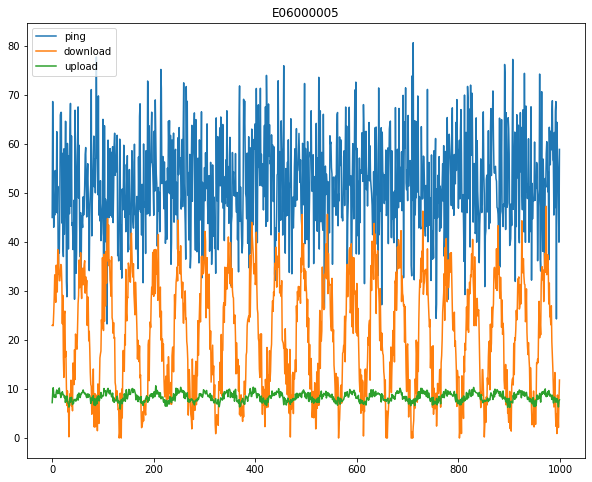

In [32]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT {}{} FROM LA_wifi_speed_UK'.format(area,s)
    
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [33]:
area = columns[0]
area

'E06000005'

## Manipular los datos con pandas

In [34]:
new_columns = ['Area','Promedio_P','Descarga_Promedio','Carga_Promedio']
df = pd.DataFrame(columns = new_columns)
df

,Area,Promedio_P,Descarga_Promedio,Carga_Promedio


In [35]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        consulta = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        cur.execute(consulta)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

,Area,Promedio_P,Descarga_Promedio,Carga_Promedio
0,E06000005,51.846910,20.965535,8.363296
1,E09000008,56.720635,23.333689,9.333504
2,E07000210,51.573143,20.958797,8.289297
3,E09000015,55.037191,22.330486,8.889196
4,E07000178,53.290965,21.408375,8.585846


In [36]:
len(df)

326

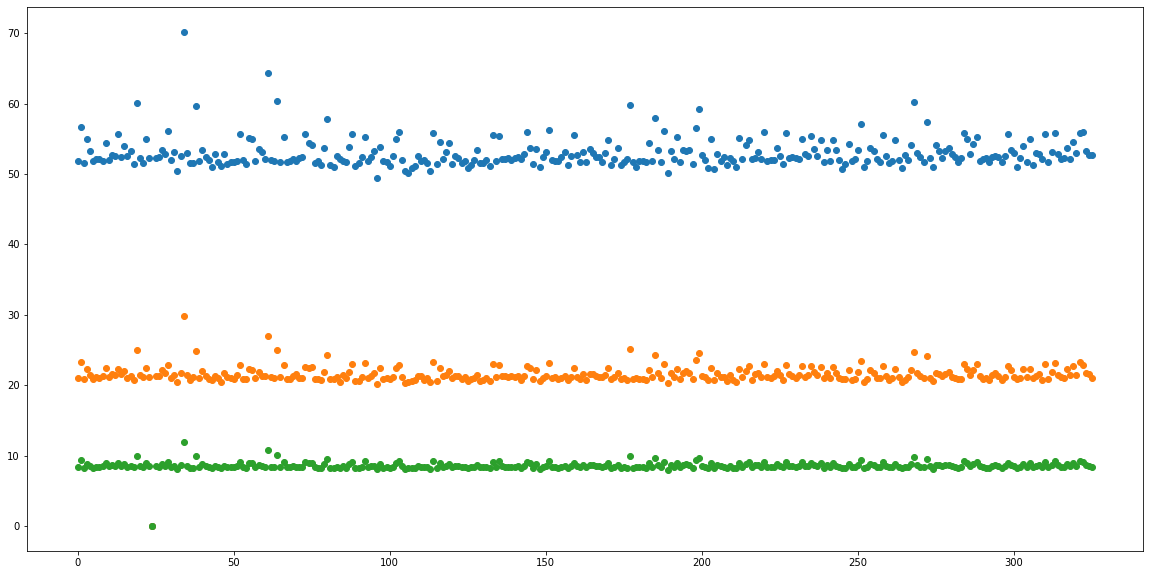

In [37]:
# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Promedio_P', 'Descarga_Promedio','Carga_Promedio']], 'o')

In [38]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
df.to_sql('average_speed', conn)

ValueError: Table 'average_speed' already exists.

In [ ]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

### Parte 4 Unir las 2 tablas  

In [ ]:
query = 'SELECT *  FROM LA_population LIMIT 10'


cur.execute(query)
k=0
for row in cur:
    print(row)

In [ ]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print (row)
    
    k+=1